<a href="https://colab.research.google.com/github/aniketinamdar/InsulinPrompt/blob/main/Insulin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt6
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import nltk 

##Reading the dataset

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Id,BS,Units,Time
0,1,165,6,B
1,2,184,10,L
2,3,105,4,D
3,4,189,10,B
4,5,174,12,L


In [130]:
df.shape

(38, 5)

##EDA

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


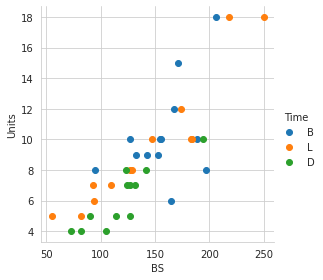

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Time", size=4)\
   .map(plt.scatter, "BS", "Units")\
   .add_legend()
plt.show()

##Preprocessing the dataset

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['Time'])
df["Transformed_time"]=le.transform(df['Time'])

In [ ]:
X = df[["Transformed_time","BS"]]
y = df["Units"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                38 non-null     int64 
 1   BS                38 non-null     int64 
 2   Units             38 non-null     int64 
 3   Time              38 non-null     object
 4   Transformed_time  38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
X_train.head()

,Transformed_time,BS
24,0,127
15,0,155
17,1,124
8,1,142
16,2,183


##Fitting the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [ ]:
print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.25


In [ ]:
df[['Time','Transformed_time']].head()

,Time,Transformed_time
0,B,0
1,L,2
2,D,1
3,B,0
4,L,2


##Making Predictions

In [ ]:
bs = int(input("Blood Sugar : "))
time = int(input("Breakfast(0), Lunch(2), Dinner(1) : "))
gnb.predict([[time,bs]])

Blood Sugar : 190
Breakfast(0), Lunch(2), Dinner(1) : 1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([10])

##Loading the model

In [ ]:
f = open('my_classifier.pickle', 'wb')
pickle.dump(gnb, f)
f.close()